In [1]:
# INPUT current time/location, budget; optional: food requirement
# OUTPUT a rank of recommended restaurants, estimated available eating/travelling time and cost

In [5]:
import json
from wordcloud import WordCloud
import matplotlib.pyplot as plt

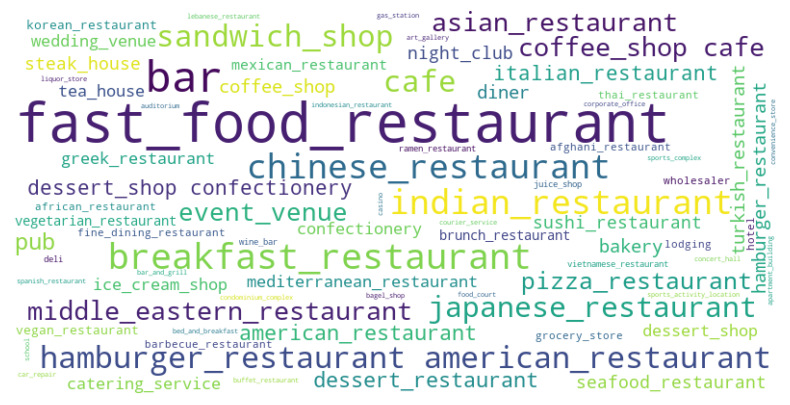

In [18]:
# Load the JSON data
with open('all_places_response.json', 'r') as file:
    data = json.load(file)

# Extract the "type" field
data = [place for place in data if place.get("businessStatus") == "OPERATIONAL"]
types = [place['types'] for place in data]
types = [item for sublist in types for item in sublist if isinstance(sublist, list)]
# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(types))

exclude_words = {"restaurant", "food", "food_store", "food_delivery", "point_of_interest", "establishment", "store", "takeaway", "meal_delivery", "meal_takeaway"}
filtered_types = [word for word in types if word not in exclude_words]

# Generate the word cloud with filtered types
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(filtered_types))

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [15]:
# Get all keys from the JSON data
all_keys = set()
for place in data:
    all_keys.update(place.keys())

for key in all_keys:
    print(key)

outdoorSeating
goodForGroups
websiteUri
takeout
id
userRatingCount
businessStatus
currentOpeningHours
paymentOptions
rating
photos
displayName
types
dineIn
parkingOptions
formattedAddress
location
delivery
priceLevel
servesVegetarianFood


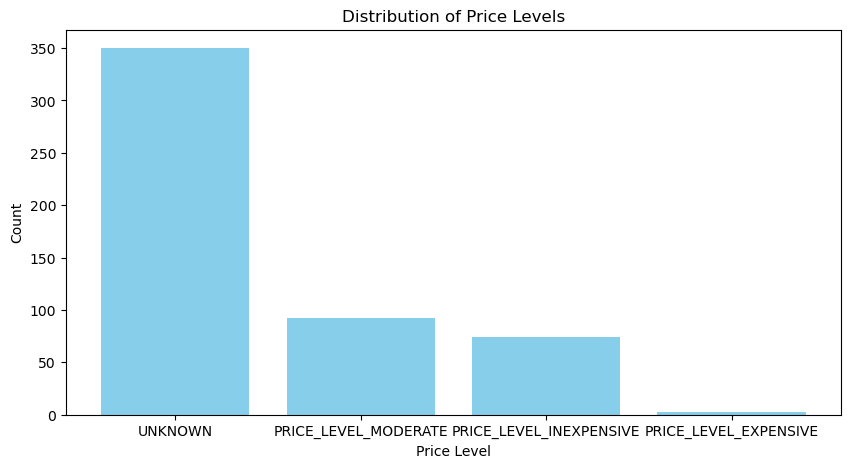

In [19]:
# Extract priceLevel data
price_levels = [place.get('priceLevel', 'UNKNOWN') for place in data]

# Count occurrences of each price level
price_level_counts = {}
for level in price_levels:
    if level in price_level_counts:
        price_level_counts[level] += 1
    else:
        price_level_counts[level] = 1

# Plot the bar chart
plt.figure(figsize=(10, 5))
plt.bar(price_level_counts.keys(), price_level_counts.values(), color='skyblue')
plt.xlabel('Price Level')
plt.ylabel('Count')
plt.title('Distribution of Price Levels')
plt.show()